In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.io import loadmat

In [172]:
a = loadmat('./datos/21-4-7/20210407-0013/20210407-0013_01.mat')
tira = a['A']
tiempos = np.arange(0,0.5-a['Tinterval'][0][0],a['Tinterval'][0][0])

In [173]:
tiempos_cortado = tiempos[::3]
tira_cortado = tira[::3,0]

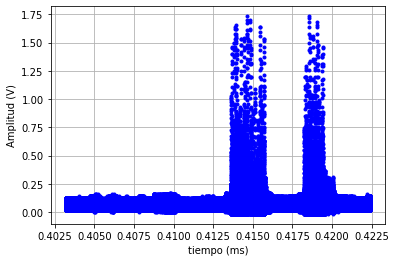

In [20]:
i = 10500000
f = 11000000
plt.plot(tiempos_cortado[i:f],tira_cortado[i:f],'.b')
plt.xlabel('tiempo (ms)')
plt.ylabel('Amplitud (V)')
plt.grid()

In [174]:
inf = tira_cortado != np.inf
count_inf = np.sum(tira_cortado == np.inf)
slices = tira_cortado[inf] > 0.01

In [175]:
filtrado_V = tira_cortado[slices]/np.max(tira_cortado[slices])
filtrado_t = tiempos_cortado[slices]

In [176]:
peaks, _ = find_peaks(filtrado_V, distance = 60, height=0.05)
maximos_V = filtrado_V[peaks]
maximos_t = filtrado_t[peaks]

<IPython.core.display.Javascript object>


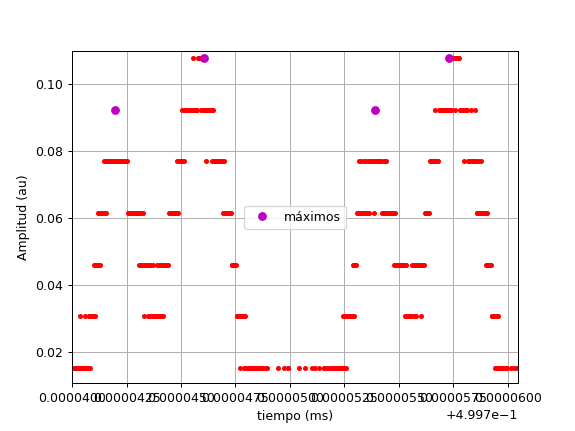

In [177]:
i = -6000
f = -3000
im = -40
fm = -21
plt.plot(filtrado_t[i:f],filtrado_V[i:f],'.r')
plt.plot(maximos_t[im:fm],maximos_V[im:fm],'om', label='máximos')
plt.xlabel('tiempo (ms)')
plt.ylabel('Amplitud (au)')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


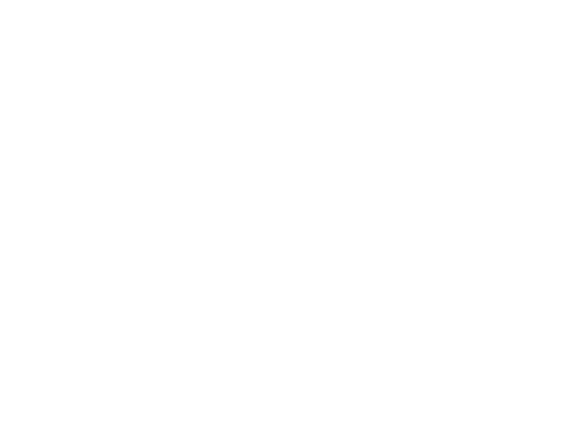

SystemError: <built-in method write of _io.BufferedWriter object at 0x7f1d83265888> returned a result with an error set

In [159]:
i=np.arange(0,len(filtrado_t),5000)
for j in range(len(i)):
    inicio=int(i[j])
    final=int(i[j+1])
    peaks, _ = find_peaks(filtrado_V[inicio:final], distance = 60, height=0.05)
    maximos_V = filtrado_V[inicio:final][peaks]
    maximos_t = filtrado_t[inicio:final][peaks]
    plt.plot(filtrado_t[inicio:final],filtrado_V[inicio:final],'.r')
    plt.plot(maximos_t,maximos_V,'*m', label='máximos')
    plt.xlabel('tiempo (ms)')
    plt.ylabel('Amplitud (au)')
    plt.grid()
    plt.savefig(f'./fmaximos/pedazo{j}')
    plt.clf()

In [107]:
%matplotlib notebook

In [ ]:
a = {18: {"distance" : 100, "height":0.05},
     17: {"distance" : 60, "height":0.05},
     16: {},
    15:  {"distance" : 60, "height":0.06},
     14: {"distance" : 60, "height":0.06}
    }